<a href="https://colab.research.google.com/github/JHUMBERTTO/Tareas/blob/main/Actividad_10_Sentiment_Analysis_Comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Análisis de Sentimientos en Comentarios de un Video Musical
Realiza en este cuaderno un **análisis de sentimiento** y una **clasificación básica** de comentarios sobre un video musical de tu elección.

**Objetivos:**
- Comprender cómo los algoritmos pueden detectar el tono emocional de un texto.
- Aplicar técnicas de preprocesamiento y visualización de datos.
- Interpretar los resultados desde una perspectiva crítica.


Accede a Youtube Data Tools https://ytdt.digitalmethods.net/  a la sección de "Video Comments", para que puedas obtener los comentarios presentes en algun video musical de tu elección que se encuentre en Youtube. Descarga en formato csv.

#Importar librerías

In [1]:
import pandas as pd
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
!pip install wordcloud
from wordcloud import WordCloud

## 1. Cargar el archivo CSV

In [2]:
data = pd.read_csv('./data.csv')

##2. Limpieza del texto (preprocesamiento)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1207 non-null   object 
 1   replyCount   18 non-null     float64
 2   likeCount    1207 non-null   float64
 3   publishedAt  1207 non-null   object 
 4   authorName   1207 non-null   object 
 5   text         1207 non-null   object 
 6   isReply      1207 non-null   float64
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   0 non-null      float64
dtypes: float64(5), object(4)
memory usage: 298.3+ KB


In [4]:
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# obtener stopwords
stop_words = set(stopwords.words('english'))

# funcion en donde limpiaremos el texto
def clean_text(text):
    if pd.isna(text):
        return []
    text = str(text).lower()
    tokens = word_tokenize(text)
    # quitamos stopwords y palabras que no son alphabeticas
    cleaned_tokens = [t for t in tokens if t not in stop_words and t.isalpha()]
    return cleaned_tokens

# utilizamos y aplicamos la funcion de clean text en nuestra data
data['cleaned_text'] = data['text'].apply(clean_text)

display(data[['text', 'cleaned_text']].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,text,cleaned_text
0,"You may not believe it, but I cried many times...","[may, believe, cried, many, times, clip, remem..."
1,the same about me,[]
2,that's gay,[gay]
3,same,[]
4,Pink,[pink]


##3. Calcular el sentimiento

In [5]:
def get_sentiment(text_list):
    if not text_list:
        return 0.0 # sentimiento neutral para texto vacios

    text_str = " ".join(text_list)
    analysis = TextBlob(text_str)
    return analysis.sentiment.polarity

data['sentiment_polarity'] = data['cleaned_text'].apply(get_sentiment)

display(data[['text', 'cleaned_text', 'sentiment_polarity']].head())

,text,cleaned_text,sentiment_polarity
0,"You may not believe it, but I cried many times...","[may, believe, cried, many, times, clip, remem...",0.268750
1,the same about me,[],0.000000
2,that's gay,[gay],0.416667
3,same,[],0.000000
4,Pink,[pink],-0.100000


## 4. Visualización de resultados - Distribución de sentimientos

/tmp/ipython-input-2984973857.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=data, palette='pastel')


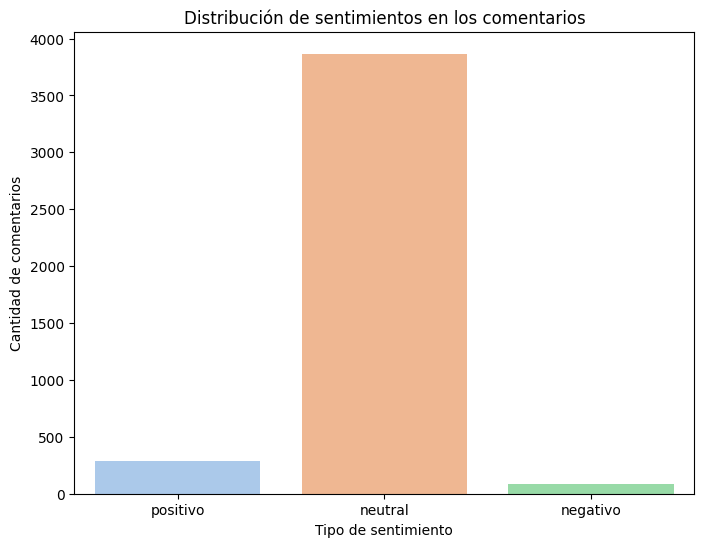

In [6]:
# Categorizamos el sentimiento
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'positivo'
    elif polarity < 0:
        return 'negativo'
    else:
        return 'neutral'

data['sentiment_category'] = data['sentiment_polarity'].apply(categorize_sentiment)

# Creamos el countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_category', data=data, palette='pastel')
plt.title('Distribución de sentimientos en los comentarios')
plt.xlabel('Tipo de sentimiento')
plt.ylabel('Cantidad de comentarios')
plt.show()

##5. Promedio general de sentimiento

In [7]:
promedio = data['sentiment_polarity'].mean()
print(f'Promedio general de sentimiento: {promedio:.3f}')

if promedio > 0:
  print('El tono general de los comentarios es POSITIVO.')
elif promedio < 0:
  print('El tono general de los comentarios es NEGATIVO.')
else:
  print('El tono general de los comentarios es NEUTRO.')

Promedio general de sentimiento: 0.022
El tono general de los comentarios es POSITIVO.


## 6. Clasificación temática

In [8]:
technical_keywords = ['voice', 'melody', 'rhythm', 'production', 'lyric', 'voz', 'melodía', 'ritmo', 'producción', 'letra', 'instrumental', 'vocals', 'beat', 'mix', 'song', 'canción', 'album']
emotional_keywords = ['love', 'hate', 'emotion', 'cry', 'smile', 'amor', 'odio', 'emoción', 'llorar', 'sonreír', 'feeling', 'sentimiento', 'sad', 'happy', 'triste', 'feliz', 'beautiful', 'hermoso']

def classify_theme(cleaned_text_list):
    if not isinstance(cleaned_text_list, list):
        return 'otro'

    if any(word in cleaned_text_list for word in technical_keywords):
        return 'tecnico'
    elif any(word in cleaned_text_list for word in emotional_keywords):
        return 'emocional'
    else:
        return 'otro'

data['theme_category'] = data['cleaned_text'].apply(classify_theme)

print("comentarios por categoría tematica:")
display(data['theme_category'].value_counts())

print("\nClasificacion tematica vs. los sentimientos:")
display(pd.crosstab(data['theme_category'], data['sentiment_category']))

comentarios por categoría tematica:


,count
theme_category,
otro,4110
tecnico,73
emocional,57



Clasificacion tematica vs. los sentimientos:


sentiment_category,negativo,neutral,positivo
theme_category,,,
emocional,6,13,38
otro,73,3829,208
tecnico,9,25,39


6.1 Visualización - Clasificación temática vs. sentimiento

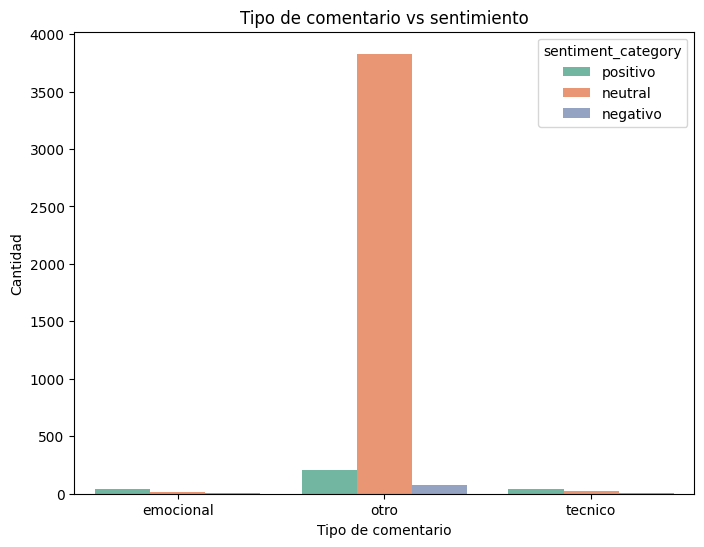

In [9]:
# Creamos el countplot

plt.figure(figsize=(8, 6))
sns.countplot(x='theme_category', hue='sentiment_category',data=data, palette='Set2')
plt.title('Tipo de comentario vs sentimiento')
plt.xlabel('Tipo de comentario')
plt.ylabel('Cantidad')
plt.show()

##7. Nube de palabras
Revisar resultado y ajustar stopwords, en caso de ser necesario (si se presentan palabras que no aporten)

In [12]:
data.head()

,id,replyCount,likeCount,publishedAt,authorName,text,isReply,Unnamed: 7,Unnamed: 8,cleaned_text,sentiment_polarity,sentiment_category,theme_category
0,e8f075e5bd54ae22b564ddc87491ed6209339efa,19.0,718.0,1/2/24 12:44,7602ea25ca7088118947aa4064cc63418cb65ec4,"You may not believe it, but I cried many times...",0.0,NaN,NaN,"[may, believe, cried, many, times, clip, remem...",0.268750,positivo,emocional
1,0e94993f74245299a2a136910e8e7bad4ecd51fb,NaN,9.0,1/2/24 13:11,9f27676778eaae65da9df56627a1bc5bed10f832,the same about me,1.0,NaN,NaN,[],0.000000,neutral,otro
2,23e6ea0c89c4fd22ff196d6cf6fbfdb30cff4e72,NaN,11.0,1/24/24 00:02,880a09e3312b08c3a66ade7461c4a573a3c924ee,that's gay,1.0,NaN,NaN,[gay],0.416667,positivo,otro
3,32d003ed5fe4d4a2d8dde962d4c69a1721600d86,NaN,8.0,3/20/24 20:15,ed80881c92e34d69ddfffb2dc788e25e2f3c37f8,same,1.0,NaN,NaN,[],0.000000,neutral,otro
4,e42f05b9eecf731651b1dac150d589a43a056a29,NaN,3.0,7/22/24 18:02,44360a0e11468472f10d80d1281fb71004dc542f,Pink,1.0,NaN,NaN,[pink],-0.100000,negativo,otro


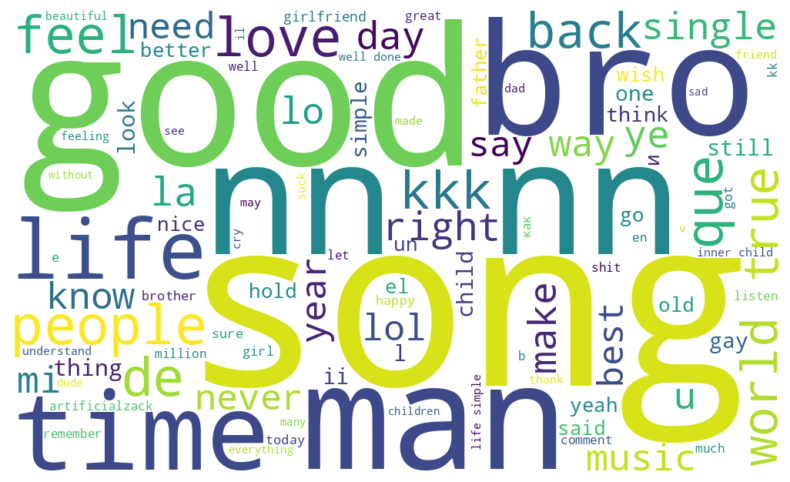

In [24]:
words = [word for sublist in data['cleaned_text'].dropna() for word in sublist]

# concatenamos todas las palabras
texto_completo_str = " ".join(words)

wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    colormap='viridis',
    max_words=100,
    stopwords=None
    ).generate(texto_completo_str)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

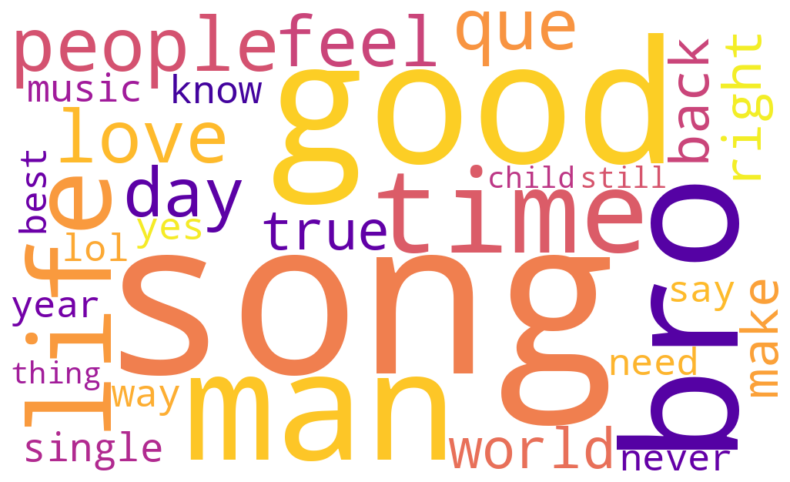

In [35]:
from wordcloud import STOPWORDS
mis_stopwords = STOPWORDS.union(["world,hold,love ,year ,music , song, good, bro, time, people, man, life, single, right, time, inner, child, gay, hold, feel, best, old, cry, brother, need, feeling, listen, back"])

words = [word for sublist in data['cleaned_text'].dropna() for word in sublist if len(word) > 2]

# concatenamos todas las palabras
texto_completo_str = " ".join(words)

wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    colormap='plasma',
    max_words=30,
    stopwords=mis_stopwords).generate(texto_completo_str)


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



## 8. Reflexión final
- Elabora una conclusión sobre lo que pudiste aprender de los comentarios del video elegido. ¿Por que elegiste esta canción/video? ¿Se tenía una mayoría de comentarios neutrales, positivos o negativos? ¿Qué palabras eran las más mencionadas y que te aporten algo de información sobre lo que se decía? ¿Esperabas ese resultado?¿Cómo podríamos mejorar el análisis?


**¿Por que elegiste esta canción/video?**

Escogí esta canción porque, además de ser muy reconocida, quería analizar una que me gustara.


**¿Se tenía una mayoría de comentarios neutrales, positivos o negativos?**

La mayoria eran neutrales.


**¿Qué palabras eran las más mencionadas y que te aporten algo de información sobre lo que se decía?**
Good, Life, Child, Best, Love, Feel, People, Man, World, Need


**¿Esperabas ese resultado? ¿Cómo podríamos mejorar el análisis?**
La verdad si esparaba un resultado positivo/neutral por que youtube quita los comentarios que sobrepasan los limites de odio.

Por otro lado para mejorar el analisis creo que deberiamos tomar en cuenta los likes, datos como ¿Con que frecuencia tiene oyentes?,¿Terminan el video completo?, ¿Cuantas veces repiten la cancion?.

A continuación, incluyo el enlace a la conversación con la IA para su revisión: https://chatgpt.com/share/6911ef98-6a28-8009-acbd-cfc910812b34

Jorge Humberto Garcia Lizarraga - A00846104.